In [1]:
#Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
#By seeing the data is cleaning no uneccsary items is there 
df=pd.read_csv("DATAM.csv")#just read csv in python file
# Now we will choose parameters to analyze the data
df
df.drop_duplicates(inplace=True)#removing dupliczte value in the DATA SET
df.head()

,Campaign ID,Campaign Name,Audience,Age,Geography,Reach,Impressions,Frequency,Clicks,Unique Clicks,Unique Link Clicks (ULC),Click-Through Rate (CTR),Unique Click-Through Rate (Unique CTR),Amount Spent in INR,Cost Per Click (CPC),Cost per Result (CPR)
0,Campaign 1,SHU_6 (Educators and Principals),Educators and Principals,25-34,"Group 1 (Australia, Canada, United Kingdom, Gh...",11387,23283,2.044700,487,406,180,2.091655,3.565469,1092.24,2.242790,6.07
1,Campaign 1,SHU_6 (Educators and Principals),Educators and Principals,35-44,"Group 1 (Australia, Canada, United Kingdom, Gh...",8761,15683,1.790092,484,376,154,3.086144,4.291748,835.46,1.726165,5.43
2,Campaign 1,SHU_6 (Educators and Principals),Educators and Principals,45-54,"Group 1 (Australia, Canada, United Kingdom, Gh...",2867,6283,2.191489,198,145,65,3.151361,5.057551,319.38,1.613038,4.91
3,Campaign 1,SHU_6 (Educators and Principals),Educators and Principals,55-64,"Group 1 (Australia, Canada, United Kingdom, Gh...",889,1890,2.125984,49,40,21,2.592593,4.499438,86.25,1.760117,4.11
4,Campaign 2,SHU3_ (Students Apart from India and US),Students,18-24,"Group 2 (Australia, Canada, United Kingdom, Gh...",29675,39161,1.319663,2593,1994,1095,6.621384,6.719461,1193.94,0.460448,1.09


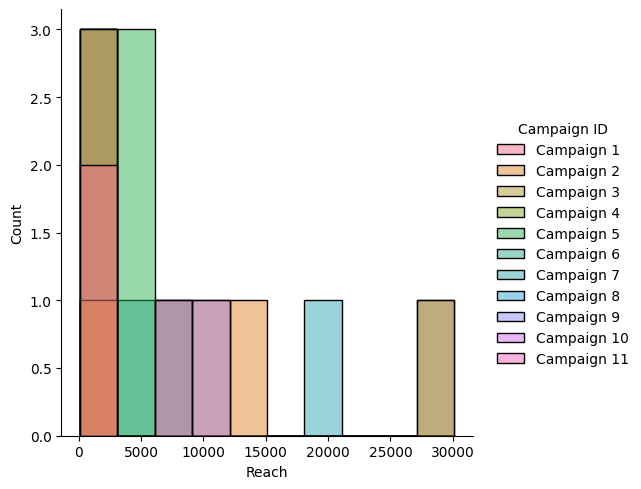

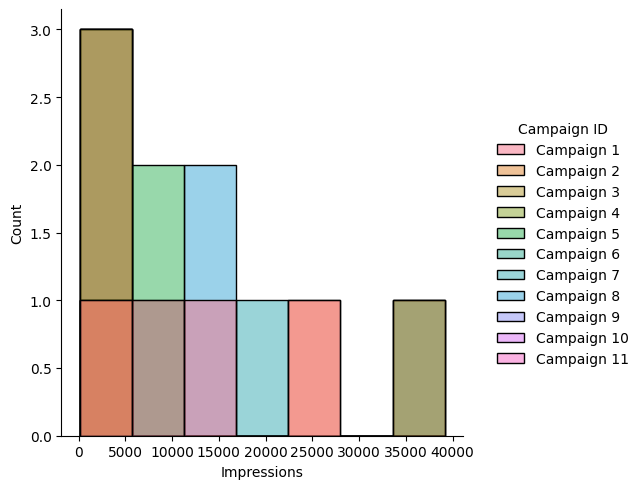

In [38]:
df["Campaign ID"].unique()# we have 11 unique campaign
#now making compare chat by  bar plot or histo plot
#add all campaign and see their impression first and plot it
sns.displot(x="Reach",data=df,hue="Campaign ID");
sns.displot(x="Impressions",data=df,hue="Campaign ID");
#plotting and comparing the campaign id with impressions
#by plotting we have saw that campaign 4 is best among themselves




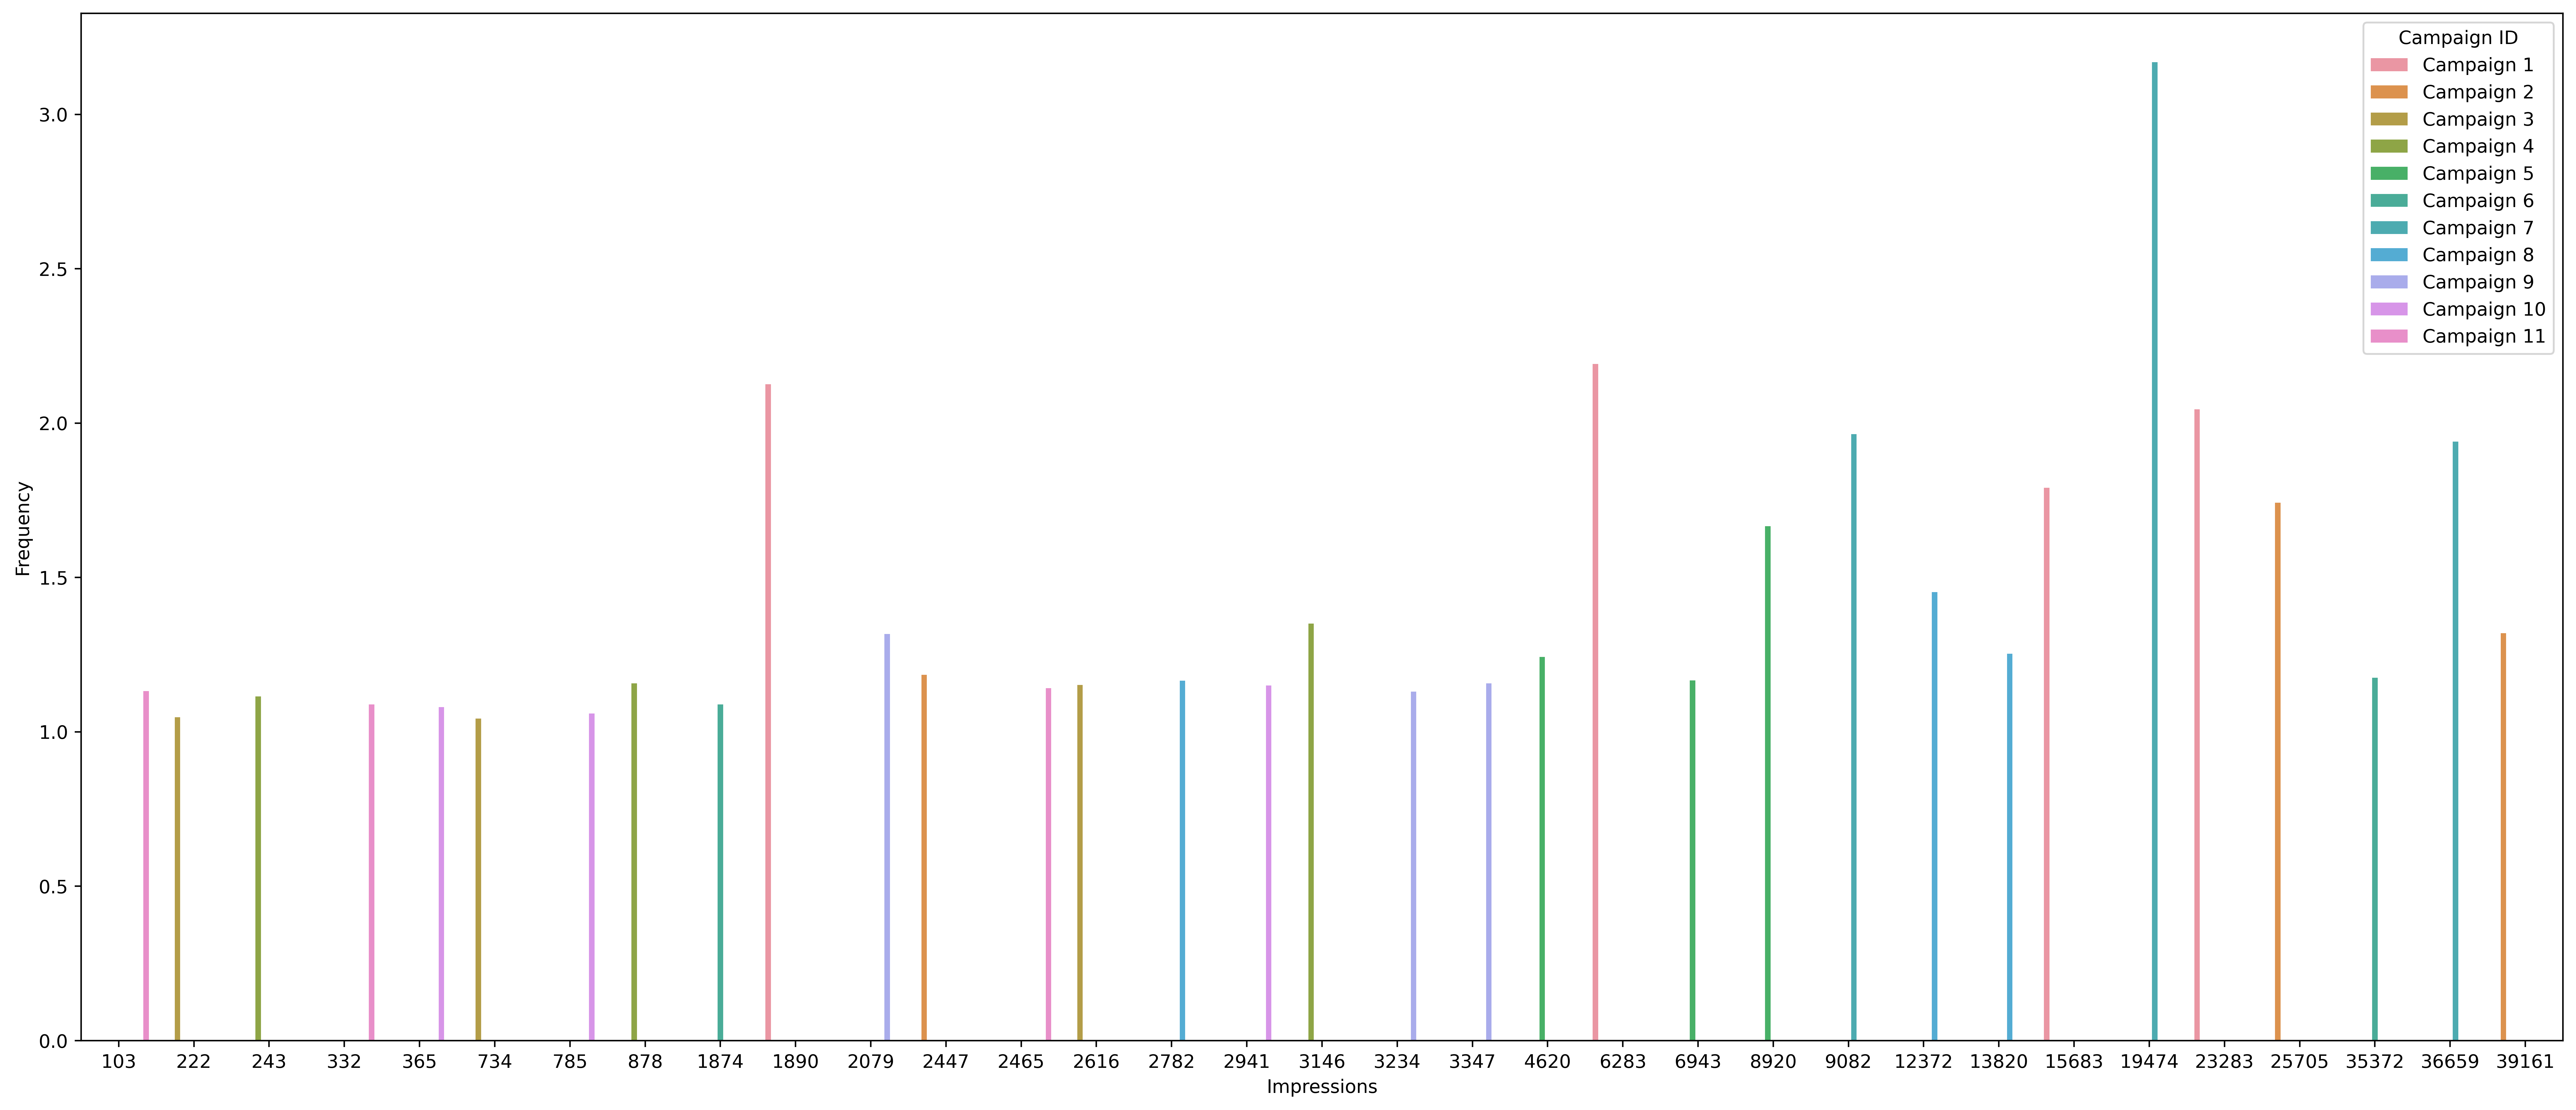

In [4]:
#PLOTTING BASIC BAR PLOT TO ANALYSE THE DATA BY SEEING IMPRESSION AND THE FREQUENCY RELATION BETWEEN THEM
plt.figure(figsize=(24,10),dpi=500)
sns.barplot(data=df,x="Impressions",y="Frequency",hue="Campaign ID");
#compare frequency of post and impression of the post

In [ ]:
#Analysing it tells that More frequency helps in more impression but campaign 2 is doing irrespective of less frequency 
#Campaign 2 is best among themselves and then Campaign 8

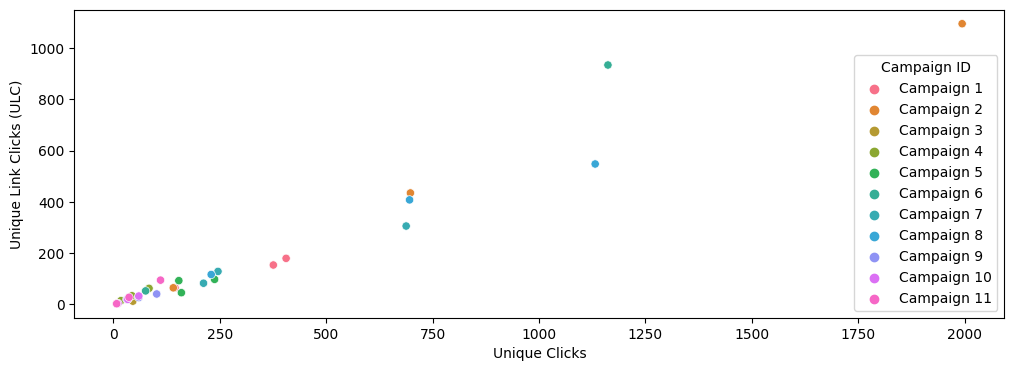

In [5]:
plt.figure(figsize=(12,4))
sns.scatterplot(x="Unique Clicks",y="Unique Link Clicks (ULC)",data=df,hue="Campaign ID");
#sns.scatterplot(x="Unique Link Clicks (ULC)",data=df,hue="Campaign ID",bins=30,height=8);

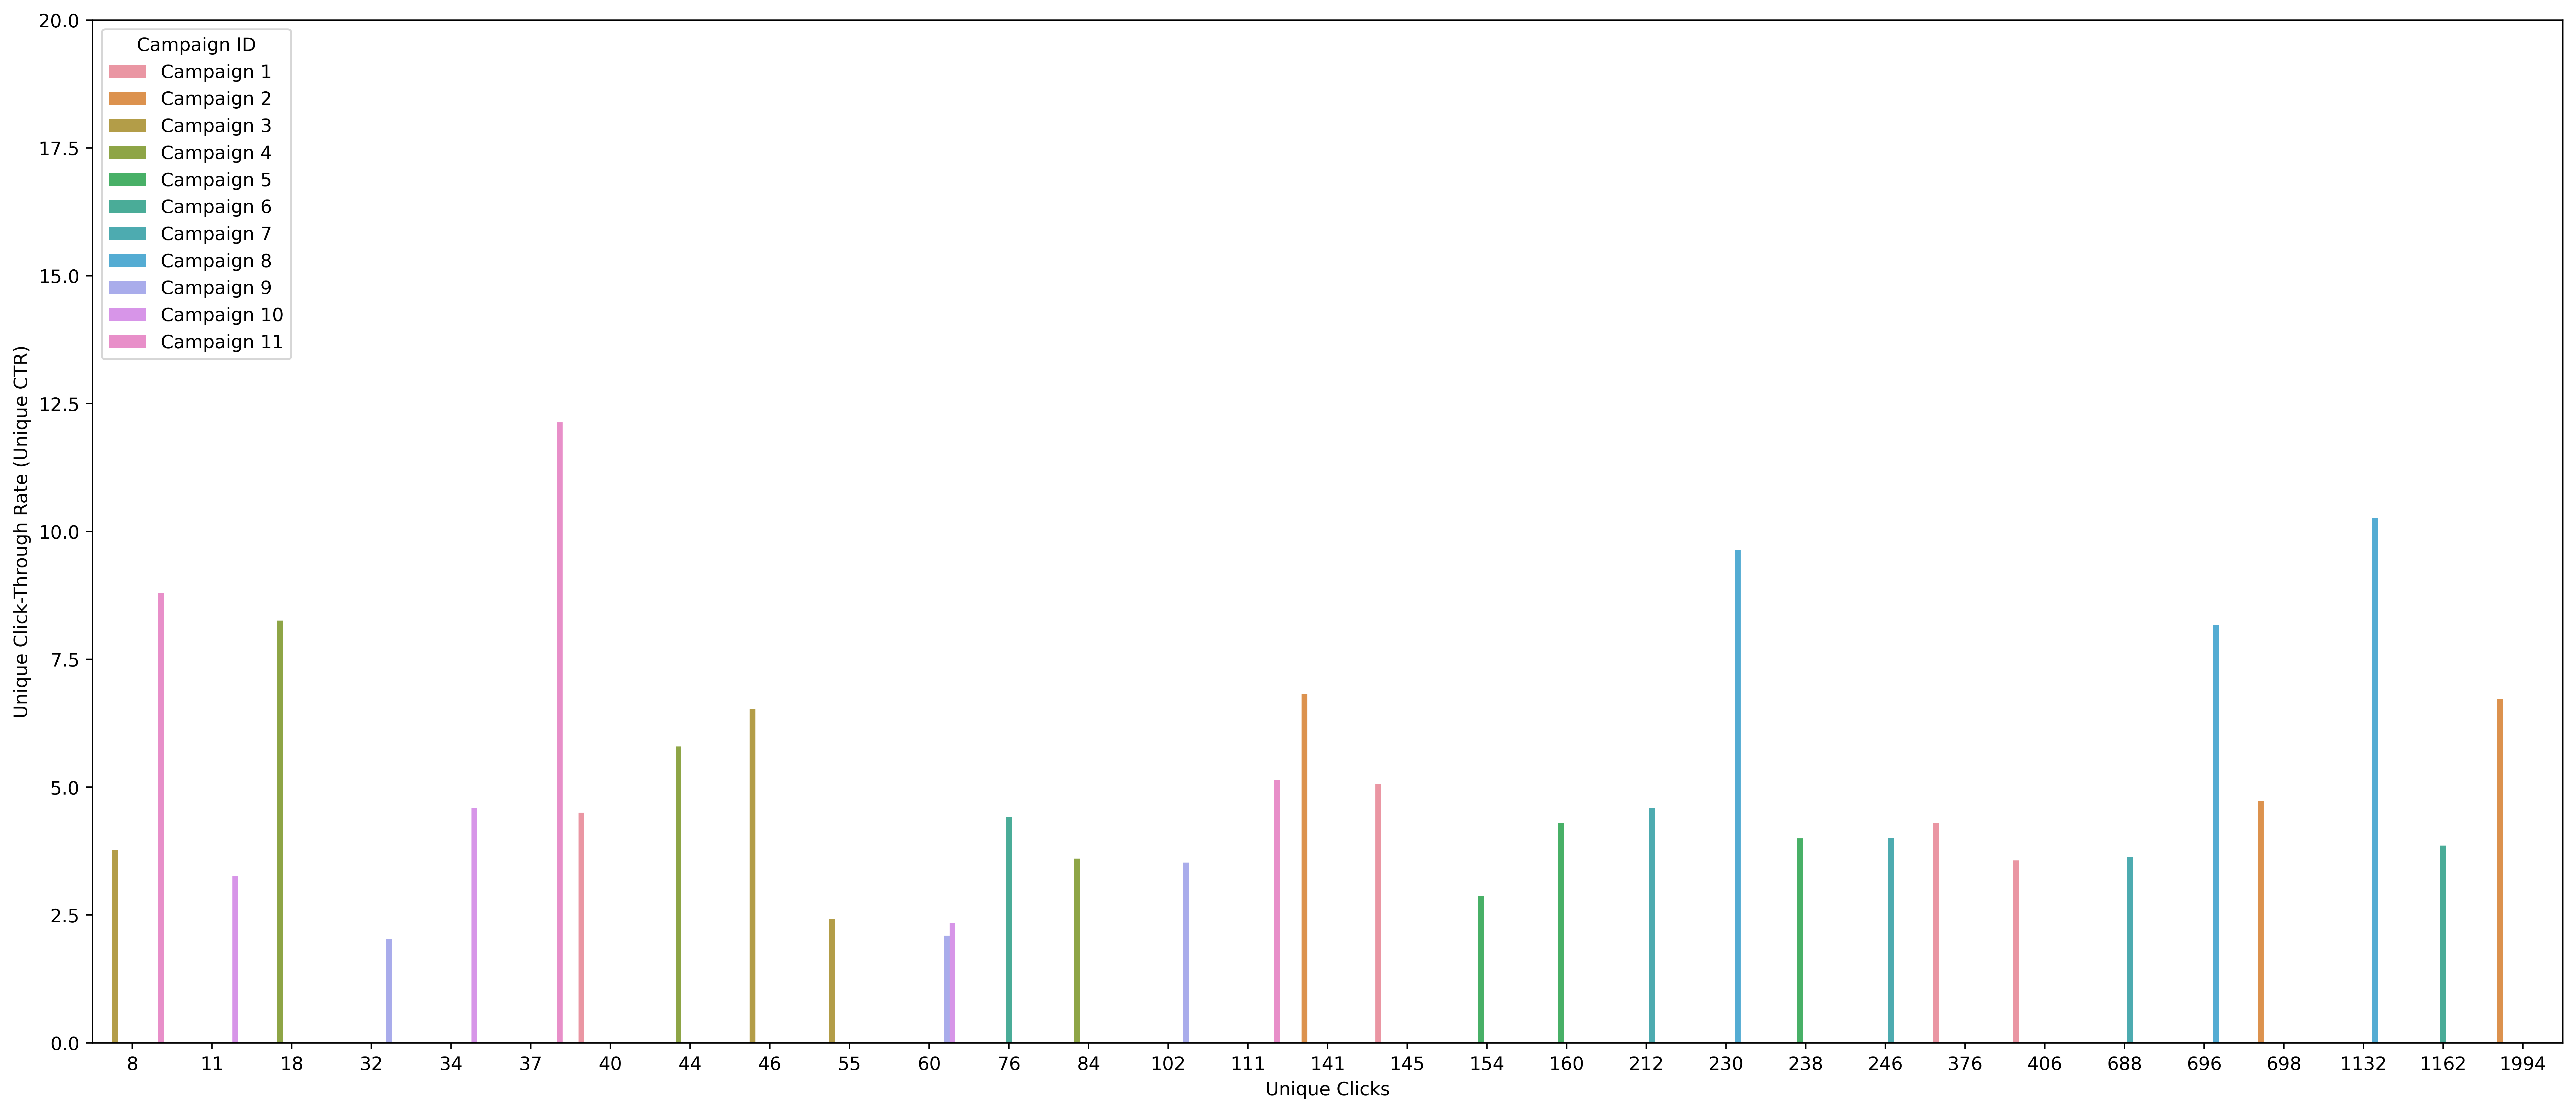

In [6]:
plt.figure(figsize=(24,10),dpi=500)
plt.ylim(0,20);
sns.barplot(data=df,x="Unique Clicks",y="Unique Click-Through Rate (Unique CTR)",hue="Campaign ID");
#through this plot 
#so by this we see that campaign 11 is doing worst performing


In [39]:
plt.figure(figsize=(40,10),dpi=500)
sns.barplot(y="Cost Per Click (CPC)",x="Clicks",data=df,hue="Campaign ID");
#By seeing this CAMPAIGN 3 WILL NOT SEEING GOOD PERFORMING AND ITS CPC IS HIGHEST AMONG EVERYONE ELSE WITH REACHING LESS CLICKS


In [11]:
campaign_data = df.groupby('Campaign ID').agg({
    'Cost per Result (CPR)': 'mean',
    'Impressions': 'sum',
    'Amount Spent in INR': 'sum'
}).reset_index()

# Rank campaigns based on mean CPR in ascending order
worst_performing_campaign = campaign_data['Campaign ID'][campaign_data['Cost per Result (CPR)'].idxmax()]



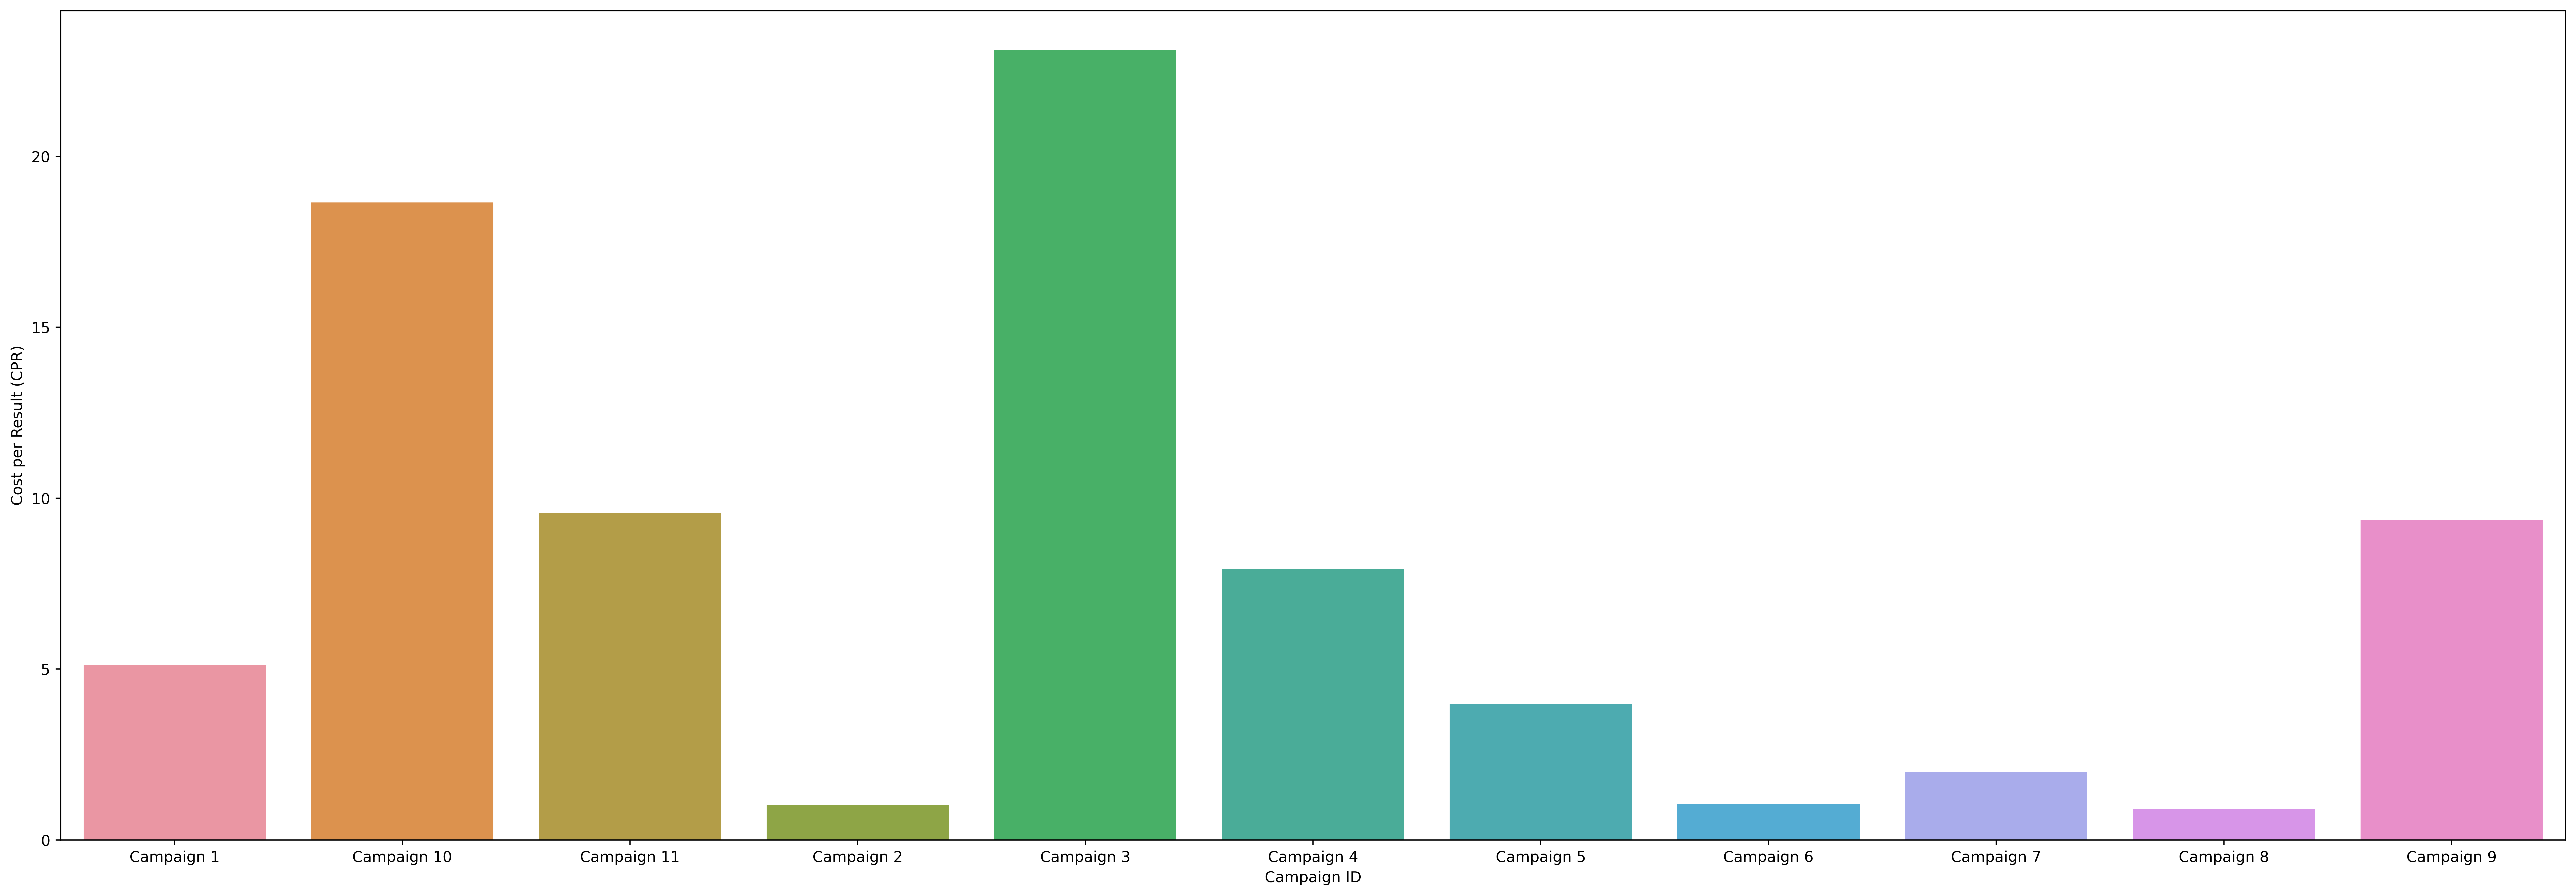

In [12]:
plt.figure(figsize=(30,10),dpi=500)
#CPR can also be calculated by dividing the total cost of an ad by the number of clicks.
#This is less common, but can still be useful for campaigns where clicks are the desired result
sns.barplot(x="Campaign ID",y="Cost per Result (CPR)",data=campaign_data);
#Campaign 3 is the highest CPR


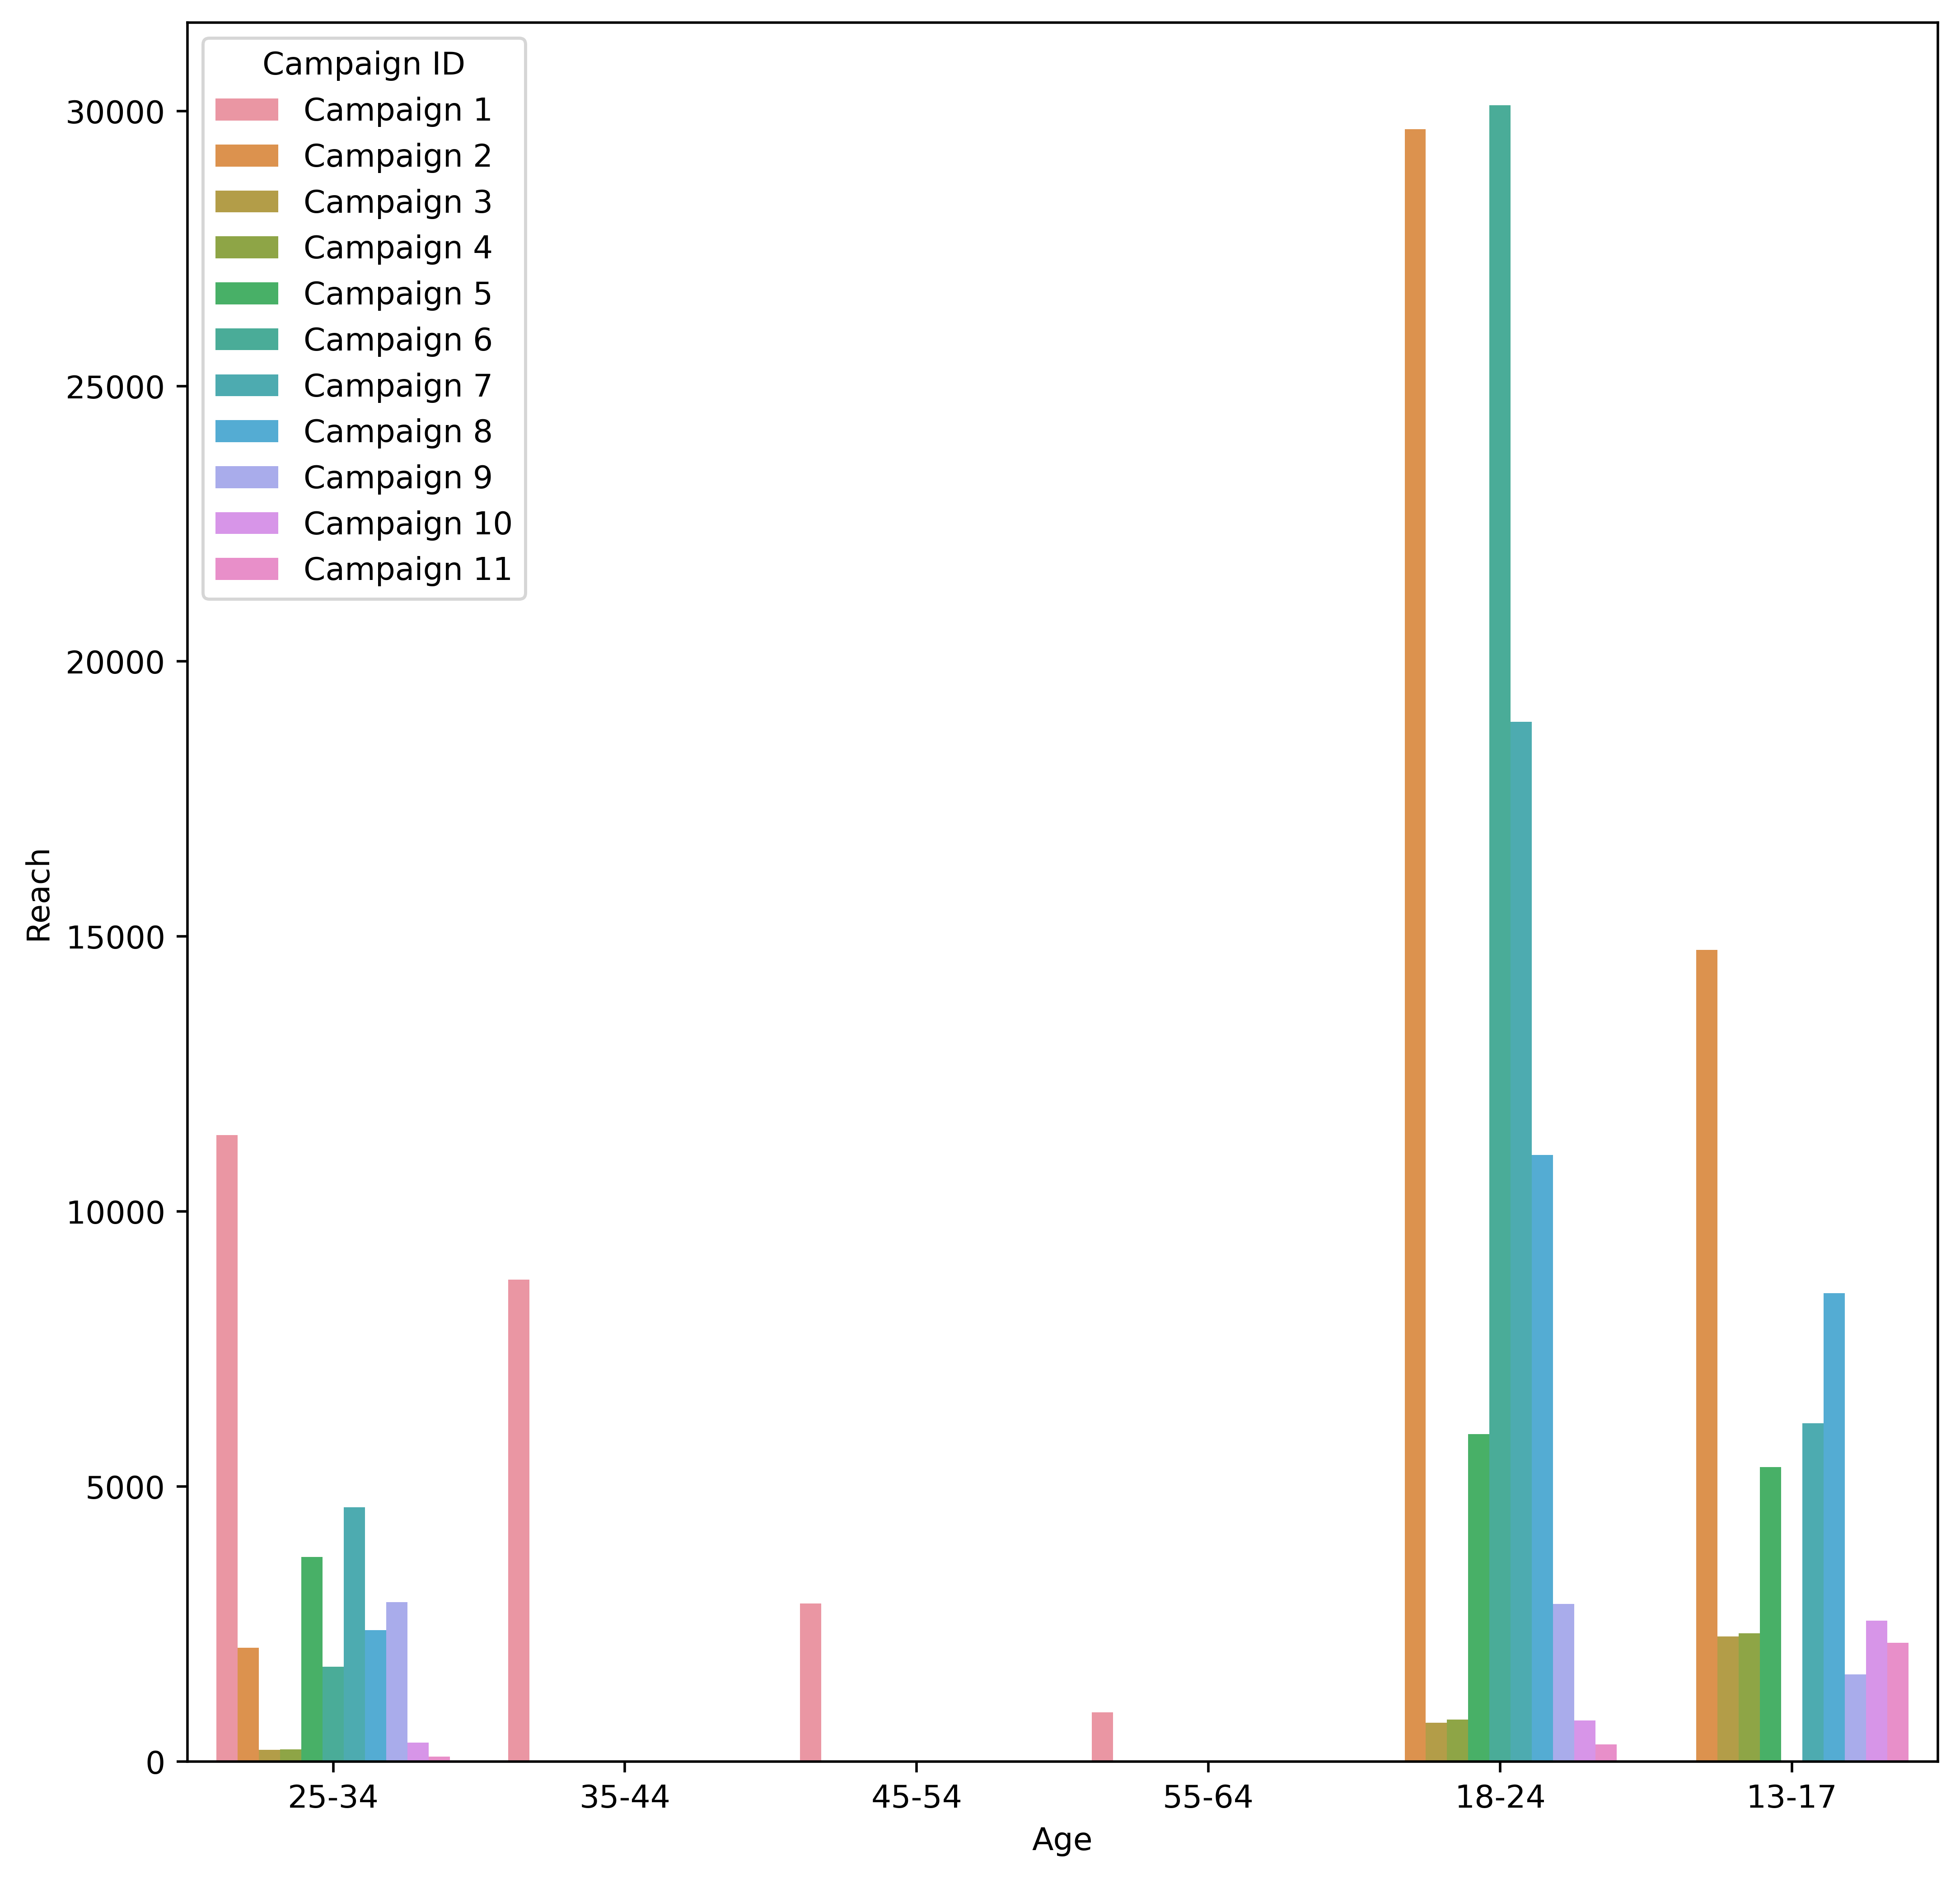

In [19]:
plt.figure(figsize=(10,10),dpi=500)
sns.barplot(x="Age",y="Reach",data=df,hue="Campaign ID");
#vizualzing the data camapign 3 has least reach in mostly every category of the age


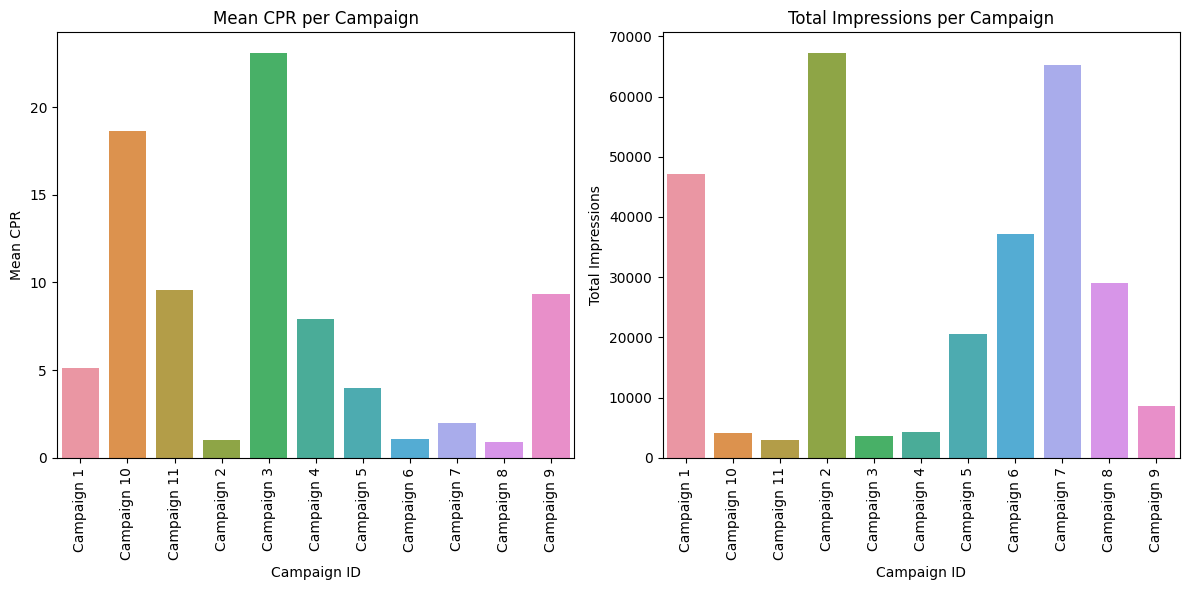

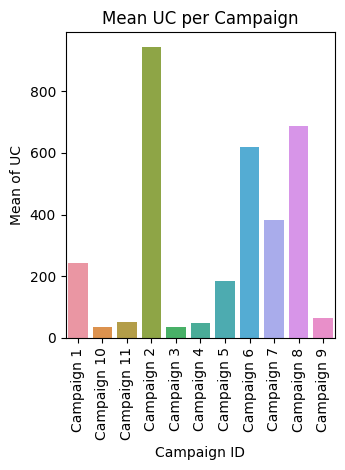

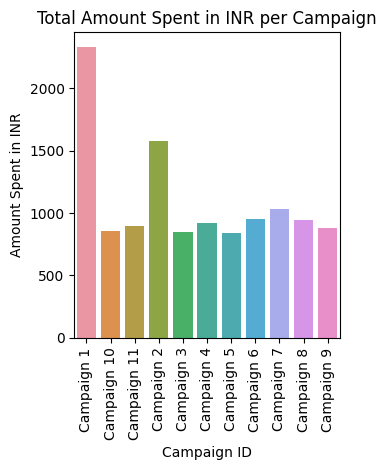

In [37]:
#CHANGE FUNCTION ACCORDING TO PLOT THE CAMPAIGN
campaign_data = df.groupby('Campaign ID').agg({
    'Cost per Result (CPR)': 'mean',
    'Impressions': 'sum',
    'Amount Spent in INR': 'sum',
     "Unique Clicks":"mean"
}).reset_index()

# Rank campaigns based on mean CPR in ascending order
worst_performing_campaign = campaign_data['Campaign ID'][campaign_data['Cost per Result (CPR)'].idxmax()]
#MORE CPR MEANS WORST PERFORMING
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.barplot(data=campaign_data, x='Campaign ID', y='Cost per Result (CPR)')
plt.xlabel('Campaign ID')
plt.ylabel('Mean CPR')
plt.title('Mean CPR per Campaign')
plt.xticks(rotation=90)
#checking impression vs Campaign ID
plt.subplot(1, 2, 2)
sns.barplot(data=campaign_data, x='Campaign ID', y='Impressions')
plt.xlabel('Campaign ID')
plt.ylabel('Total Impressions')
plt.title('Total Impressions per Campaign')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()
#MEAN OF UC TELLS WHICH IS THE BEST PERFORMING CAMPAIGN
plt.subplot(1, 2, 2)
sns.barplot(data=campaign_data, x='Campaign ID', y='Unique Clicks')
plt.xlabel('Campaign ID')
plt.ylabel('Mean of UC')
plt.title('Mean UC per Campaign')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

#Amount Spent in INR For each Campaign
plt.subplot(1, 2, 2)
sns.barplot(data=campaign_data, x='Campaign ID', y='Amount Spent in INR')
plt.xlabel('Campaign ID')
plt.ylabel('Amount Spent in INR')
plt.title('Total Amount Spent in INR per Campaign')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()



In [ ]:
#Conclusion:
# By seeing all anlytics and comparing within the givwn graph the worst performing Campaign will campaign 3 and campaign 10


